In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy.random as nrm
import math

Implement principal component analysis (PCA) to decorrelate data. How will you check if your algorithm is working
as intended? Find examples where PCA fails.

In [2]:
img_path = "/home/varshi/Downloads/4.2.07.tiff"

In [3]:
img = plt.imread(img_path)
img.shape

(512, 512, 3)

In [4]:
def reshaping(img):
    h,w,c = img.shape[0],img.shape[1],img.shape[2]
    X = np.reshape(img,(h*w,c))
    return X

In [5]:
X = reshaping(img)
print(X.shape)
N = X.shape[0]
d = X.shape[1]
print(N)
X = X-np.mean(X,axis=0)
print("Mean of rows of X :",np.mean(X,axis=0))
X_trans = np.transpose(X)
Cxx=np.dot(X_trans,X)/(N-1)
print(Cxx.shape)
print(Cxx)

(262144, 3)
262144
Mean of rows of X : [0. 0. 0.]
(3, 3)
[[2040.73526296  932.94476624  790.62941793]
 [ 932.94476624 5631.93771601 2784.83454399]
 [ 790.62941793 2784.83454399 1961.19882705]]


In [6]:
eigval,eigvec = LA.eig(Cxx)
e_t = np.transpose(eigvec)
#print("Eigen value: ",eigval)
#print("Eigen vector: ",eigvec)

In [7]:
print(X.shape)
print(eigvec.shape)
print(e_t.shape)

(262144, 3)
(3, 3)
(3, 3)


In [8]:
Y = np.dot(X,eigvec)
print(Y.shape)
Cyy = np.matmul(Y.T,Y)/(N-1)
print(Cyy.shape)
print(Cyy)

(262144, 3)
(3, 3)
[[ 7.39934877e+03 -1.31295476e-11  1.44776965e-11]
 [-1.31295476e-11  1.81878962e+03  7.81129532e-12]
 [ 1.44776965e-11  7.81129532e-12  4.15733414e+02]]


Non diagonal entries of the Cyy matrix are close to zero. Implying, it is a diagonal matrix. Also, the matrix is symmetric. PCA works by identifying orthogonal components. For a non symmetric matrix, the eigen vectors would not be orthogonal

In [10]:
Y = np.reshape(Y,img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Decorrelated')

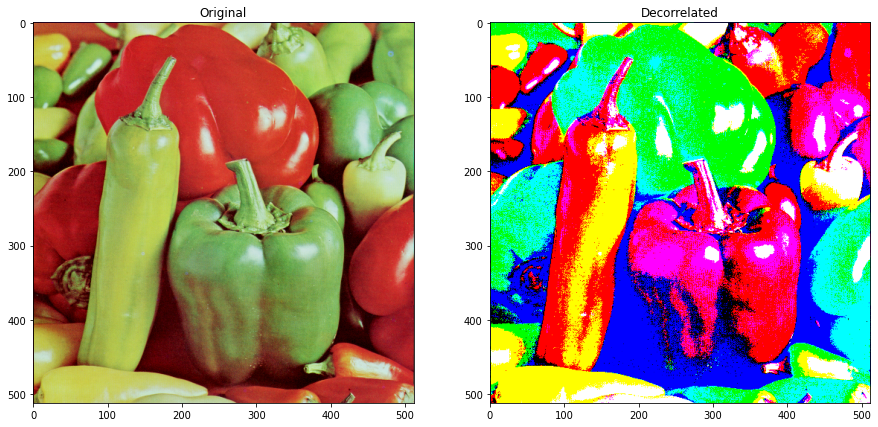

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(img)
ax1.set_title("Original")
ax2.imshow(Y)
ax2.set_title("Decorrelated")

#### Failure of PCA -
1. PCA works for strongly correlated data. If this condition is not met, then PCA fails. Example : Take 2 variables X and Y, if the data is such that a change in X doesn't reflect a change in Y, then PCA would fail.
2. We know our algorithm is working as expected when Cyy is a diagonal matrix. PCA would be of no use if this criteria not met.
3. PCA works on linear assumptions. It would fail on working with non linear data (any data where there is no straight line relationship between two variables) or on data that demans non linear components. 